# **Tugas Implementasi GPU**

 **Nama Anggota Kelompok :**
1.   Risma Faoziya (24060119120001)
2.   Doma Zaneta (24060119140069)
3.   Merry Tantri Millenia Tobing (24060119120013)
4.   Salma Safira Ramadhanti (24060119140109)

Komputasi Tersebar dan Paralel (A)




# **A. Import Library**

In [1]:
import cv2
import time
import math
import glob
from google.colab.patches import cv2_imshow
import numpy as np
import cupy as cp
import numba
import matplotlib.pyplot as plt
from PIL import Image

# **B. Memuat Gambar**

In [ ]:
 !unzip images.zip

Archive:  images.zip
  inflating: 1024.jpg                
  inflating: 1800.jpg                
  inflating: 256.jpg                 
  inflating: 4000.jpg                
  inflating: 512.jpg                 


In [ ]:
def plot_comparison(d_s,d_p,title):
  plt.figure(figsize=(11,6))
  speedup = sum(d_s.values())/sum(d_p.values())
  print('Average Speedup:',str(int(speedup))+'x')
  x = sorted(list(map(int,d_s.keys())))
  y_s= [d_s[str(i)] for i in x]
  y_p= [d_p[str(i)] for i in x]
  labels = ['{}x{}'.format(i,i) for i in x]
  plt.plot(x,y_s,marker='o')
  plt.plot(x,y_p,marker='o')
  plt.xticks(x,labels,rotation=45)
  plt.xlabel('RESOLUTION')
  plt.ylabel('Time in ms')
  plt.legend(['Sequential','CUDA'])
  plt.title(title)
  plt.show



In [ ]:
def adj_show(a,b):
  dim = a.shape
  dim_border = (a.shape[0],30) if len(dim)==2 else (a.shape[0],30,3)
  cv2_imshow(np.concatenate((a,255*np.ones(dim_border),b),axis=1))

In [ ]:
images={}
for filename in glob.glob('*.jpg'):
    im=cv2.imread(filename)
    images[filename.split('.')[0]]=im
images.keys()

dict_keys(['1024', '256', '512', '1800', '4000'])

In [ ]:
#Pendefinisian
lamb = 150
threshold = 150

### **Melakukan grayscale citra untuk operasi thresholding**

In [ ]:
def grayscale_sequential(img):               #Sequential
  GI = []
  for i in range(img.shape[0]):
    l = []
    for j in range(img.shape[1]):
      l.append(sum(img[i][j])/3)
    GI.append(l)
  GI = np.array(GI)
  return GI

In [ ]:
@numba.njit('float64[:,:](uint8[:,:,:])')        #CUDA backend
def grayscale_parallel(img):
  return (img[:,:,0]+img[:,:,1]+img[:,:,2])/3

In [ ]:
#Calculating time (Sequential) - Grayscale
t_gray_seq = {}
out_gray_seq = {}
for name,image in images.items():
  start = time.time()
  out_gray_seq[name]=grayscale_sequential(image)
  t_gray_seq[name] =  time.time() - start
t_gray_seq

{'1024': 5.255184173583984,
 '1800': 15.976039171218872,
 '256': 0.32711195945739746,
 '4000': 78.72605013847351,
 '512': 1.279371738433838}

In [ ]:
#Calculating time (Parallel) - Grayscale
t_gray_p = {}
out_gray_p = {}
for name,image in images.items():
  start = time.time()
  out_gray_p[name]=grayscale_parallel(images[name])
  t_gray_p[name] =  time.time() - start
t_gray_p

{'1024': 0.010088920593261719,
 '1800': 0.027623653411865234,
 '256': 0.0004019737243652344,
 '4000': 0.1356511116027832,
 '512': 0.0016543865203857422}

Average Speedup: 578x


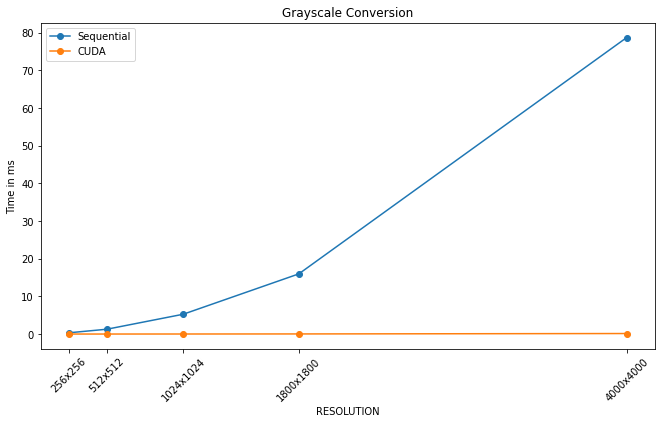

In [ ]:
plot_comparison(t_gray_seq,t_gray_p,'Grayscale Conversion')

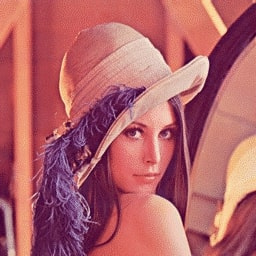

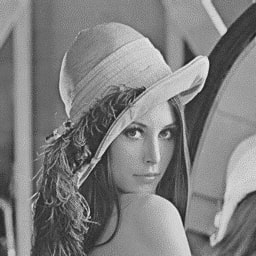

In [ ]:
cv2_imshow(images['256'])
cv2_imshow(out_gray_p['256'])

# **C. Image Processing**

## **a. Negative Filter**

In [ ]:
def negative_sequential(img):         #Sequential
  NI = []
  for i in range(img.shape[0]):
    l = []
    for j in range(img.shape[1]):
      q = []
      for k in range(img.shape[2]):
        q.append(255-img[i][j][k])
      l.append(q)
    NI.append(l)
  NI = np.array(NI)
  return NI

In [ ]:
@numba.vectorize('uint8(uint8)',target='parallel')           #CUDA backend
def negative_parallel(img):
  return 255-img

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
#Calculating time (Sequential) - Negative
t_neg_seq = {}
out_neg_seq = {}
for name,image in images.items():
  start = time.time()
  out_neg_seq[name]=negative_sequential(images[name])
  t_neg_seq[name] =  time.time() - start
t_neg_seq

{'1024': 12.460841178894043,
 '1800': 37.43179702758789,
 '256': 0.6995499134063721,
 '4000': 177.0868513584137,
 '512': 2.997056245803833}

In [ ]:
#Calculating time (Parallel) - Negative
t_neg_p = {}
out_neg_p = {}
for name,image in images.items():
  start = time.time()
  out_neg_seq[name]=negative_parallel(images[name])
  t_neg_p[name] =  time.time() - start
t_neg_p

{'1024': 0.03748679161071777,
 '1800': 0.09848618507385254,
 '256': 0.001987934112548828,
 '4000': 0.4866936206817627,
 '512': 0.012485504150390625}

In [ ]:
# Fungsi untuk menghitung selisih runtime rata2
import numpy as np 
import pandas as pd
def sub_aver(a,b):
  c = list(a.keys())
  d = list(b.keys())
  sum=0
  result=0
  for i in range(0,len(c)):
    result = a.get(c[i])-b.get(d[i])
    sum+=result
  sum/=len(c)
  return sum

46.007791137695314

In [ ]:
# selisih runtime rata2 Negative Filter Conversion
sub_aver(t_neg_seq,t_neg_p)

Average Speedup: 362x


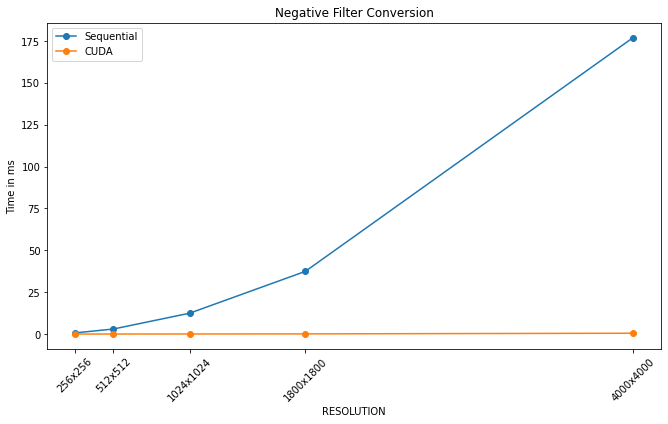

In [ ]:
plot_comparison(t_neg_seq,t_neg_p,'Negative Filter Conversion')

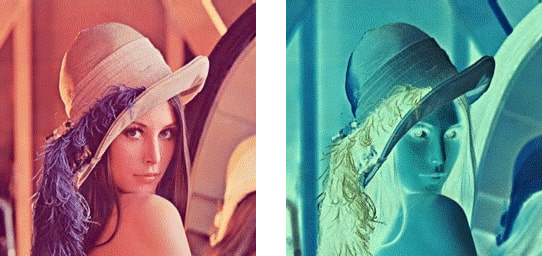

In [ ]:
adj_show(images['256'],out_neg_seq['256'])

## **b. Thresholding Filter**

In [ ]:
def thresholding_sequential(img,threshold):           #Sequential
  G_th = []
  for i in range(img.shape[0]):
    l = []
    for j in range(img.shape[1]):
      l.append(255 if img[i][j] >= threshold else 0)
    G_th.append(l)
  G_th = np.array(G_th)
  return G_th

In [ ]:
@numba.jit('float64[:,:](float64[:,:],float64[:,:],uint8)')             #Using CUDA jit decorator
def thresholding_parallel(img,out,threshold):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i,j] >= threshold:
        out[i,j] = 255.0
      else:
        out[i,j] = 0.0

  return out

In [ ]:
#Calculating time (Sequential) - Thresholding
t_thr_seq = {}
out_thr_seq = {}
for name,image in out_gray_seq.items():
  start = time.time()
  out_thr_seq[name]=thresholding_sequential(out_gray_seq[name],threshold)
  t_thr_seq[name] =  time.time() - start
t_thr_seq

{'1024': 0.8450024127960205,
 '1800': 2.551974296569824,
 '256': 0.04784655570983887,
 '4000': 12.616502285003662,
 '512': 0.19286274909973145}

In [ ]:
#Calculating time (Parallel) - Thresholding
t_thr_p = {}
out_thr_p = {}
for name,image in out_gray_seq.items():
  start = time.time()
  output = np.empty_like(out_gray_seq[name])
  out_thr_p[name]=thresholding_parallel(out_gray_seq[name],output,threshold)
  t_thr_p[name] =  time.time() - start
t_thr_p

{'1024': 0.004231691360473633,
 '1800': 0.004858732223510742,
 '256': 0.00015115737915039062,
 '4000': 0.023798465728759766,
 '512': 0.0005972385406494141}

In [ ]:
# selisih runtime rata2 Thresholding
sub_aver(t_thr_seq,t_thr_p)

3.2441102027893067

Average Speedup: 483x


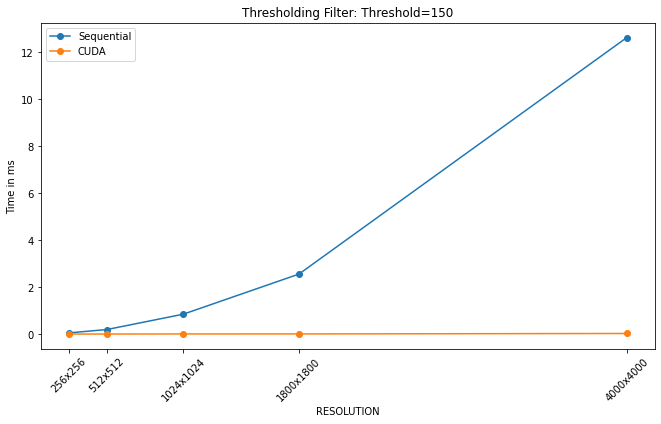

In [ ]:
plot_comparison(t_thr_seq,t_thr_p,'Thresholding Filter: Threshold={}'.format(threshold))

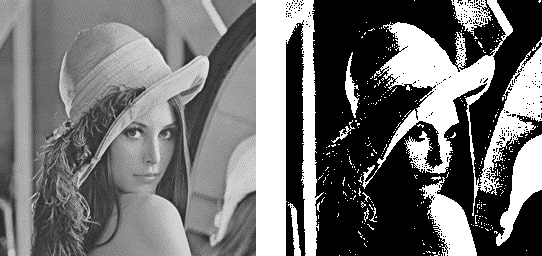

In [ ]:
adj_show(out_gray_seq['256'],out_thr_seq['256'])

## **c. Brightening Filter**

In [ ]:
def brightening_sequential(img,lamb):       # Sequential
  BI = []
  ki = math.pi/(2*lamb)
  for i in range(img.shape[0]):
    l = []
    for j in range(img.shape[1]):
      q = []
      for k in range(img.shape[2]):
        q.append(lamb * math.sin(ki*img[i][j][k]))
      l.append(q)
    BI.append(l)
  BI = np.array(BI)
  return BI
  

In [ ]:
@cp.fuse()                                       #CuPY FUSE decorator for creating CUDA Kernel
def brightening_parallel(img,lamb):
  xp = cp.get_array_module(img)
  ki = xp.pi/(2*lamb)
  return lamb * xp.sin(ki*img)

In [ ]:
#Calculating time (Sequential) - Brightening
t_BI_seq = {}
out_BI_seq = {}
for name,image in images.items():
  start = time.time()
  out_BI_seq[name]=brightening_sequential(images[name],lamb)
  t_BI_seq[name] =  time.time() - start
t_BI_seq

{'1024': 12.54231858253479,
 '1800': 40.3718695640564,
 '256': 0.7527410984039307,
 '4000': 194.95955562591553,
 '512': 3.0123860836029053}

In [ ]:
#Calculating time (Parallel) - Brightening
t_BI_p = {}
out_BI_p = {}
for name,image in images.items():
  start = time.time()
  im_gpu = cp.asarray(images[name])
  out_gpu=brightening_parallel(im_gpu,lamb)
  out_BI_p[name] = out_gpu.get()
  t_BI_p[name] =  time.time() - start
t_BI_p

{'1024': 58.94095420837402,
 '1800': 0.039099931716918945,
 '256': 0.0017938613891601562,
 '4000': 0.188126802444458,
 '512': 0.002561807632446289}

In [ ]:
# selisih runtime rata2 Brightening Filter
sub_aver(t_BI_seq,t_BI_p)

38.493266868591306

Average Speedup: 4x


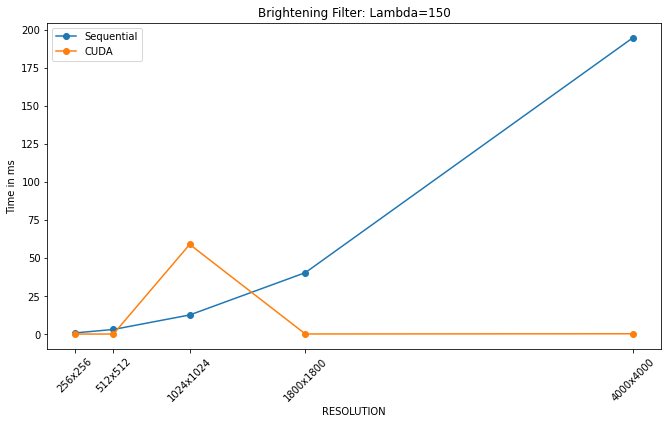

In [ ]:
plot_comparison(t_BI_seq,t_BI_p,'Brightening Filter: Lambda={}'.format(lamb))

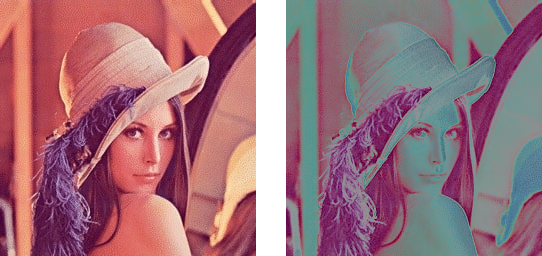

In [ ]:
adj_show(images['256'],out_BI_seq['256'])